# Reseau de neurones profonds

## ALGO : ANN

#### Imporation des modules necessaires

In [2]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_circles

# Formules importantes:

## Le perceptron :
On note $n$ le nombre de paramètres de $x$, $m$ le nombre d'élément $x$


$z(x_1,x_2,...,x_m)=x_1\times w_1 + x_2\times w_2 + ... + x_m\times w_m + b$

### Fonction sigmoïde

$a(z) = \frac{1}{1 + e^{-z}}$

### Fonction coût

$L=\frac{-1}{m}\times \sum_{i=1}^{m} y_i\times \log{a_i} + (1 - y_i)\times \log(1 - a_i)$

### Les gradients :

$\frac{\partial{L}}{\partial{w_n}} = \frac{1}{m} \sum_{i=1}^{m} (a_i - y_i)\times x_ni $

$\frac{\partial{L}}{\partial{b}} = \frac{1}{m} \sum_{i=1}^{m} (a_i - y_i)$


## Vectorisation des précédentes formules :

### Matrice de l'entrée X :

$X = \begin{bmatrix}
x_1^{ 1} & x_2^{ 1} & ... & x_n^{ 1}\\
x_1^{ 2} & x_2^{ 2} & ... & x_n^{ 2}\\
... & ... & ... & ...\\
x_1^{ m} & x_2^{ m} & ... & x_n^{ m}\\
\end{bmatrix} \in R^{m\times n}$
### Matrice de conditions y :

$Y= \begin{bmatrix}
Y_1\\Y_2\\...\\Y_m\\
\end{bmatrix} \in R^{m\times 1}$
### Matrice des gradients : 

$w= \begin{bmatrix}
w_1\\w_2\\...\\w_n\\
\end{bmatrix} \in R^{n\times 1}$
### Expression de Z :

$Z = X\times W + b, b \in R = \begin{bmatrix}
z_1\\z_2\\...\\z_m\\
\end{bmatrix} \in R^{m\times 1}$

### Expression de la fonction sigmoïde :
$A = \frac{1}{1 + e^{-Z}} = \begin{bmatrix}
a_1\\a_2\\...\\a_m\\
\end{bmatrix} \in R^{m\times 1}$

### Expression de la fonction coût :

$L =\frac{-1}{m}\times \sum_{i=1}^{m} Y_i\times \log{A_i} + (1 - Y_i)\times \log(1 - A_i)$

### Descente de gradients :

#### Dérivées partielles :

$\frac{\partial{L}}{\partial{W}} = \frac{1}{m} \times X^{T} \times (A-Y) = \begin{bmatrix}
\frac{\partial{L}}{\partial{W_1}}\\
\frac{\partial{L}}{\partial{W_2}}\\
\frac{\partial{L}}{\partial{W_i}}\\
\frac{\partial{L}}{\partial{W_n}}\\
\end{bmatrix} \in R^{n\times 1}$

$\frac{\partial{L}}{\partial{b}} = \frac{1}{m} \sum_{i=1}^{m} (A_i - Y_i)$

#### Algorithme de descente de gradients

$W_{t+1} = W_t - \alpha \frac{\partial{L}}{\partial{W}}$

$b_{t+1} = b_t - \alpha \frac{\partial{L}}{\partial{b}}$

###

$dZ^{[C_f]} = A^{[C_f]} - y$

$dW^{[c]} = \frac{1}{m} \times dZ^{[c]} \cdot A^{[c-1]^{T}}  $ 

Il s'agit d'un produit matriciel et non scalaire

$db^{[c]} = \frac{1}{m} \times \sum_{i=1}^{m} dZ^{[c]}_i$

$dZ^{[c-1]} = W^{[c]^{T}} \cdot dZ^{[c]} \times A^{[c-1]}(1-A^{[c-1]})$



### Creation d'une classe couche qui utilise une fonction d'activation sigmoide 

In [24]:
class couche:
    def __init__(self,nbr_neurone,nbr_parametre,numero_couche):
        self.nbr_neurone = nbr_neurone
        self.nbr_parametre = nbr_parametre
        self.numero = numero_couche
        
    def initialisation(self):
        self.W = np.random.randn(self.nbr_parametre,self.nbr_neurone)
        self.b = np.random.randn(self.nbr_neurone)
        
            
    
    def model(self,X,y):
        self.y = y
        self.Z = np.dot(X,self.W) + self.b
        self.A = 1/(1 + np.exp(-self.Z))
        
        
    def LogLoss(self):    
        self.L = -1/len(self.y) * np.sum(self.y * np.log(self.A + 1e-15) + (1-self.y)*np.log(1-self.A + 1e-15))
        
    def gradient(self,X,dZ):
        self.dW = 1/len(self.y) * np.dot(X.transpose(),dZ) ## vrai car on injecte le fonction d'activation A de la couche precedente en tant que X
        self.db = 1/len(self.y) * np.sum(dZ)
        self.dZ_pre = np.dot(self.dW,dZ.transpose()).transpose() * X * (1-X)
    
    def descente_gradients(self,pas):
        self.W = self.W - pas*self.dW
        self.b = self.b - pas*self.db
        

        
        
        
    

### Creation d'une classe permettant de créer un model de classification binaire

In [25]:
class binary_model:
    def __init__(self,name):
        self.name = name
        self.L_evolution=[]
    
    def initialisation(self,neurones_specs):
        couche_neurones=[]
        for i in range(len(neurones_specs)):
            couche_neurones.append(couche(neurones_specs[i]["neurones"],neurones_specs[i]["parametres"],neurones_specs[i]["couche"]))
            couche_neurones[i].initialisation()
        self.couche_neurones=couche_neurones
        self.neuron_numbers=len(self.couche_neurones)
        
    
    def forward_propagation(self,X,y):
        X_train = X
        for i in range(self.neuron_numbers):
            self.couche_neurones[i].model(X_train,y)
            X_train = self.couche_neurones[i].A
        self.couche_neurones[(self.neuron_numbers -1)].LogLoss()        

    
    
    def test(self,X_test,y_test):
        L=[]
        X=X_test
        for i in range(self.neuron_numbers):
            self.couche_neurones[i].model(X,y_test)
            X=self.couche_neurones[i].A
        y_prediction =(self.couche_neurones[(self.neuron_numbers -1)].A >= 0.5).astype(int)
        return y_prediction
    
    def score_F1(self,y,y_prediction):
        TP = 0
        FP = 0
        FN = 0
        for i in range(len(y)):
            if(y_prediction[i]==1):
                if(y[i]==1):
                    TP+=1
                else:
                    FP+=1
            else:
                if(y[i]==1):
                    FN += 1
            
        self.precision = TP/(TP + FP)
        self.recall = TP/(TP + FN)
        self.F1_score = 2 *((self.precision*self.recall)/(self.precision+self.recall)) 
        
    def prediction(self,X):
        X_compute = X
        for i in range(self.neuron_numbers):
            self.couche_neurones[i].model(X_compute,0)
            X_compute=self.couche_neurones[i].A
        return ((self.couche_neurones[(self.neuron_numbers -1)].A >= 0.5).astype(int))
    
    def back_propagation(self,X,pas):
        L = self.couche_neurones[(self.neuron_numbers-1)].LogLoss()
        dZ=self.couche_neurones[(self.neuron_numbers-1)].A - self.couche_neurones[(self.neuron_numbers-1)].y
        X_train=self.couche_neurones[(self.neuron_numbers-2)].A
        for i in reversed(range(1,self.neuron_numbers)):
            self.couche_neurones[i].gradient(X_train,dZ)
            X_train=self.couche_neurones[i-1].A
            dZ=self.couche_neurones[i].dZ_pre
        self.couche_neurones[0].gradient(X,dZ)
        
        for i in self.couche_neurones:
            i.descente_gradients(pas)


    def train(self,X,y,pas,epoch,batch_size,step=1):
        for i in tqdm(range(epoch)):
            iteration_start=random.randint(0,(len(y)-batch_size-1))
            X_train = X[iteration_start:(iteration_start+batch_size)]
            y_train = y[iteration_start:(iteration_start+batch_size)]
            self.forward_propagation(X_train,y_train)
            self.back_propagation(X_train,pas)
            if (i%step==0):
                self.L_evolution.append(self.couche_neurones[(self.neuron_numbers-1)].L)
            if (i%2500==0): 
                pas = pas - ((1/20)*pas)
                self.pas = pas
    
    def plot_L(self):
        plt.plot([i for i in range(len(self.L_evolution))],self.L_evolution,label='LogLoss')
        plt.show(self.L_evolution)
        
    def reset_L(self):
        self.L_evolution_backup=self.L_evolution
        self.L_evolution=[]
        
    def print_gradient(self):
        return self.couche_neurones[0].dW
        
        

### Creation d'une classe pour le pre-processing d'un CNN:

$Z \in R^{ m\times f\times y\times x}$  
y,x correspond à la taille des images avec y la hauteur et x la largeur  
f le nombre de features de l'image  
m le nombre d'images utilisées  

In [26]:
class pre_process_CNN:
    def __init__(self,preprocessing):
        self.preprocessing=preprocessing
    
    def convolution(self,X,X_height,X_width,y,y_shape,pas):
        Z = np.zeros([X_height - (2 * pas), X_width - (2 * pas)])
        
        for i in range(pas, (X_height - pas)):
            for j in range(pas, (X_width - pas)):
                Z[i-pas,j-pas] = np.sum(X[i - pas:i + pas + 1, j - pas:j + pas + 1] * y)   
        Z=np.resize(Z,[1,Z.shape[0],Z.shape[1]])
        return np.clip(Z,0,255)#
        
    def couche_convolution_standart(self,X,y):#y est une liste de noyeaux de convolution sous forme de tableau 4D et X une liste des images sous forme de tableau 3D
        output=np.zeros([1,y.shape[0]*X[0].shape[0],int(X.shape[-2]-(y[0].shape[0]-1)),int(X.shape[-1]-(y[0].shape[0]-1))])
        for image in X:
            output_convolution=np.zeros([1,int(X.shape[-2]-(y[0].shape[0]-1)),int(X.shape[-1]-(y[0].shape[0]-1))]) # creation d un resultat de la bonne shape
            for feature in image:
                for filtre in y:
                    output_convolution=np.append(output_convolution,self.convolution(feature,feature.shape[0],feature.shape[1],filtre,filtre.shape[0],int((filtre.shape[0]-1)/2)),axis=0)
            output=np.append(output,np.resize(output_convolution[1:],[1,output_convolution[1:].shape[0],output_convolution[1:].shape[1],output_convolution[1:].shape[2]]),axis=0)
        return output[1:]
    
    def couche_maxPool(self,X,pas): #X est une liste des images sous forme de tableau 4D
        output=np.zeros([1,X.shape[1],int(X.shape[2]/pas),int(X.shape[3]/pas)])
    
        X_height=X.shape[2]
        X_width=X.shape[3]
        for image in X:
            output_maxpool=np.zeros([1,int(X.shape[2]/pas),int(X.shape[3]/pas)])
            for feature in image:
                output_maxpool=np.append(output_maxpool,self.maxPool(feature,X_height,X_width,pas),axis=0)
            
            output=np.append(output,np.resize(output_maxpool[1:],[1,output_maxpool[1:].shape[0],output_maxpool[1:].shape[1],output_maxpool[1:].shape[2]]),axis=0)
    
        return output[1:]     
                
    def couche_meanPool(self,X,pas): #X est une liste des images sous forme de tableau 4D
        output=np.zeros([1,X.shape[1],int(X.shape[2]/pas),int(X.shape[3]/pas)])
    
        X_height=X.shape[2]
        X_width=X.shape[3]
        for image in X:
            output_meanpool=np.zeros([1,int(X.shape[2]/pas),int(X.shape[3]/pas)])
            for feature in image:
                output_meanpool=np.append(output_meanpool,self.meanPool(feature,X_height,X_width,pas),axis=0)
            
            output=np.append(output,np.resize(output_meanpool[1:],[1,output_meanpool[1:].shape[0],output_meanpool[1:].shape[1],output_meanpool[1:].shape[2]]),axis=0)
    
        return output[1:]                
    
    def maxPool(self,X,X_height,X_width,pas):
        MAX=np.zeros([int(X_height/pas),int(X_width/pas)])
        for i in range(0,X_height,pas):
            for j in range(0,X_width,pas):
                MAX[int(i/pas),int(j/pas)] = np.max(X[i:i+pas,j:j+pas])
        MAX=np.resize(MAX,[1,MAX.shape[0],MAX.shape[1]])
        return MAX
    
    def meanPool(self,X,X_height,X_width,pas):
        MOY=np.zeros([int(X_height/pas),int(X_width/pas)])
        for i in range(0,X_height,pas):
            for j in range(0,X_width,pas):
                MOY[int(i/pas),int(j/pas)] = np.mean(X[i:i+pas,j:j+pas],dtype="int")
        MOY=np.resize(MOY,[1,MOY.shape[0],MOY.shape[1]])
        return MOY 
       
    def initialisation(self,X):
        self.output=X
        
    def processing(self):
        
        for couche in self.preprocessing:
            if (couche["fonction"]=="maxpool"):
                self.output=self.couche_maxPool(self.output,couche["pas"])
            elif (couche["fonction"]=="meanpool"):
                self.output=self.couche_meanPool(self.output,couche["pas"])
            elif (couche["fonction"]=="convolution"):
                self.output=self.couche_convolution_standart(self.output,couche["y"])
            
            
        new_shape = (self.output.shape[0], int(self.output.shape[1] * self.output.shape[2] * self.output.shape[3]))
        self.output.resize(new_shape)
        self.output=self.output/255
        
        return self.output



In [27]:
y=np.array([[[0,1,0],[1,-4,1],[0,1,0]],[[0,-1,0],[-1,4,-1],[0,-1,0]]])
preprocessing=pre_process_CNN([{"fonction":"convolution","y":y},{"fonction":"convolution","y":y}])

X=np.random.randint(256,size=[10,1,32,32])

preprocessing.initialisation(X)
result=preprocessing.processing()


In [28]:
result

array([[0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.52941176, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.8       , ..., 0.        , 0.69411765,
        0.        ],
       [0.76470588, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [29]:
X=np.zeros([1,10,9,9])
X=np.append(X,np.random.randint(256,size=[1,10,9,9]),axis=0)
X.shape

(2, 10, 9, 9)

In [30]:
x=np.array([[[[1,2],[4,5]],[[6,7],[8,9]]],[[[10,11],[12,13]],[[14,15],[16,17]]],[[[1,2],[4,5]],[[6,7],[8,9]]]])
x.resize(x.shape[0],int(x.shape[1]*x.shape[2]*x.shape[3]))
x

array([[ 1,  2,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [ 1,  2,  4,  5,  6,  7,  8,  9]])

In [31]:
X=np.random.randint(256,size=[10,9,9])
X.resize(1,X.shape[0],X.shape[1],X.shape[1])

In [32]:
for i in X[-1]:
    print(i.shape)

(9, 9)
(9, 9)
(9, 9)
(9, 9)
(9, 9)
(9, 9)
(9, 9)
(9, 9)
(9, 9)
(9, 9)


In [33]:
X=np.append(X,np.random.randint(256,size=[1,10,9,9]),axis=0)

In [34]:
for i in X:
    print(i.shape)

(10, 9, 9)
(10, 9, 9)


### Test avec un dataset de sklearn

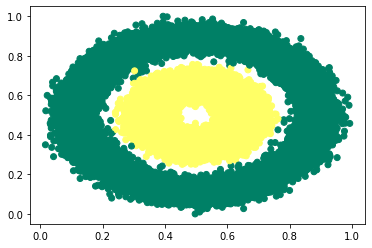

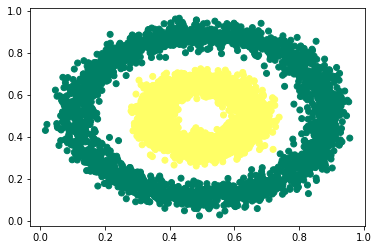

In [35]:
split=5000
X, y = make_circles(n_samples=50000,noise=0.08,factor=0.4,random_state=0)
y = y.reshape((y.shape[0]),1)

X=(X-np.min(X))
X=(1/np.max(X))*X
X_train = X[split:]
y_train = y[split:] 
plt.scatter(X_train.T[0, :], X_train.T[1, :],c=y_train, cmap='summer')
plt.show()



X_test = X[:split]
y_test = y[:split]
plt.scatter(X_test.T[0, :], X_test.T[1, :],c=y_test, cmap='summer')
plt.show()


In [36]:
score_F1=0
while (score_F1<0.98):
    tri_circle_model_V1=binary_model("tri_circle")
    tri_circle_model_V1.initialisation([{"couche":1 ,"neurones":64 ,"parametres":2 },{"couche":2 ,"neurones":64 ,"parametres":64 },{"couche":3 ,"neurones":1 ,"parametres":64 }])
    tri_circle_model_V1.train(X_train,y_train,np.array([0.3]),5000,512)
    tri_circle_model_V1.score_F1(y_test,tri_circle_model_V1.prediction(X_test))
    score_F1= tri_circle_model_V1.F1_score
    print(score_F1)

100%|██████████████████████████████████████| 5000/5000 [00:14<00:00, 339.91it/s]


0.9160305343511451


100%|██████████████████████████████████████| 5000/5000 [00:14<00:00, 346.79it/s]


0.989694730701925


### Evolution de la fonction coût

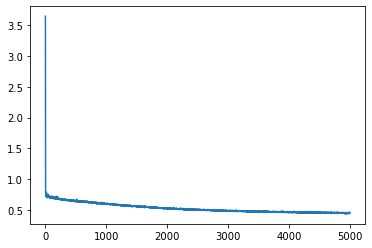

In [37]:
tri_circle_model_V1.plot_L()

### Données relatives au score F1

In [38]:
tri_circle_model_V1.F1_score

0.989694730701925

In [39]:
tri_circle_model_V1.recall

1.0

In [40]:
tri_circle_model_V1.precision

0.9795996920708238

### Sauvegarde du model final :

In [41]:
tri_circle_model_Vf=tri_circle_model_V1

In [42]:
x = tri_circle_model_Vf.print_gradient()

1.49448719636252e-09